# **Data Wrangling with Pandas**

The second part explains some more advanced features that will be useful when addressing more complex data management tasks. 

**Data wrangling** is the process of cleaning, structuring and enriching raw data into a desired format for better decision making in less time.

Initially, we imported pandas library as pd.

**set_option(pat, value) :** This function sets the value of the specified option.

Parameters are:
    
1. **pat :** Regexp which should match a single option. It is in string format.

2. **value :** New value of option

In [1]:
import pandas as pd
import numpy as np

# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

## **Date/Time data handling**

The **datetime** module supplies classes for manipulating dates and times. 

In [2]:
from datetime import datetime

**datetime.now() :** Return the current local date and time.

In [3]:
now = datetime.now()
now

datetime.datetime(2021, 1, 10, 10, 20, 30, 706659)

**date.day :** Between 1 and the number of days in the given month of the given year.

In [4]:
now.day

10

**date.weekday() :** Return the day of the week as an integer, where Monday is 0 and Sunday is 6.

In [5]:
now.weekday()

6

In [6]:
from datetime import date, time

**datetime.time() :** An idealized time, independent of any particular day, assuming that every day has exactly 24*60*60 seconds. Attributes are *hour*, *minute*, *second*, *microsecond*, and *tzinfo.*

In [7]:
time(3, 24)

datetime.time(3, 24)

**datetime.date() :** An idealized naive date, assuming the current Gregorian calendar always was, and always will be, in effect. Attributes are *year*, *month*, and *day*.

In [8]:
date(1970, 9, 3)

datetime.date(1970, 9, 3)

***Note :*** We can customise data type and perform operations for date and time easily.

In [9]:
my_age = now - datetime(1970, 9, 3)     # calculating difference between two times.
my_age

datetime.timedelta(days=18392, seconds=37230, microseconds=706659)

**date.day :** Between 1 and the number of days in the given month of the given year.

In [10]:
my_age.days/365.

50.38904109589041

In this section, we will manipulate data collected from ocean-going vessels on the eastern seaboard.

**Automatic Identification System (AIS) :** It is a safety at sea navigation technology which vessels are required to maintain and that uses transponders to transmit *very high frequency (VHF)* radio signals containing static information including ship name, call sign, and country of origin, as well as dynamic information unique to a particular voyage such as vessel location, heading, and speed.

For our purposes, we will use summarized data that describes the transit of a given vessel through a particular administrative area. The data includes the start and end time of the transit segment, as well as information about the speed of the vessel, how far it travelled, etc.

In [11]:
segments = pd.read_csv(r"C:\Users\91939\Downloads\data\data\AIS\transit_segments.csv")
segments.head()

   mmsi               name  transit  segment  seg_length  avg_sog  min_sog  \
0     1        Us Govt Ves        1        1         5.1     13.2      9.2   
1     1  Dredge Capt Frank        1        1        13.5     18.6     10.4   
2     1      Us Gov Vessel        1        1         4.3     16.2     10.3   
3     1      Us Gov Vessel        2        1         9.2     15.4     14.5   
4     1  Dredge Capt Frank        2        1         9.2     15.4     14.6   

   max_sog  pdgt10        st_time       end_time  
0     14.5    96.5  2/10/09 16:03  2/10/09 16:27  
1     20.6   100.0   4/6/09 14:31   4/6/09 15:20  
2     20.5   100.0   4/6/09 14:36   4/6/09 14:55  
3     16.1   100.0  4/10/09 17:58  4/10/09 18:34  
4     16.2   100.0  4/10/09 17:59  4/10/09 18:35  

**pandas.DataFrame.hist() :** Makes a histogram of the DataFrame’s. This function calls matplotlib.pyplot.hist(), on each series in the DataFrame, resulting in one histogram per column.

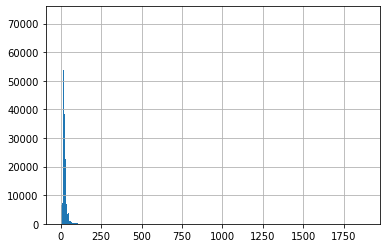

In [12]:
segments.seg_length.hist(bins=500)

Bellow implementation: Applies log function to each series in the DataFrame then plots histogram.

**pandas.DataFrame.apply() :** Apply a function along an axis of the DataFrame.

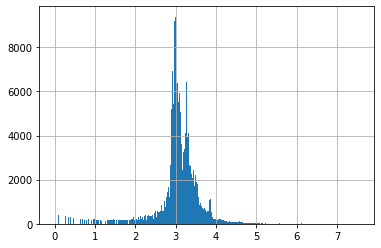

In [13]:
segments.seg_length.apply(np.log).hist(bins=500)

***Note :*** We found that although there are date/time field in the dataset, they are not in any specialized format, such as datetime.

In [14]:
segments.st_time.dtype

dtype('O')

First objective : to convert these data to datetime.

**datetime.strptime() :** It parse a string representing a time according to a format. The return value is a *struct_time* as returned by *gmtime()* or *localtime().*

In [15]:
datetime.strptime(segments.st_time.iloc[0], '%m/%d/%y %H:%M')          # ix is depreciated, therefore used iloc to access index

datetime.datetime(2009, 2, 10, 16, 3)

**parse :** This module offers a generic date/time string parser which is able to parse most known formats to represent a date and/or time.

**dateutil.parser :** Class which handles what inputs are accepted. Subclass this to customize the language and acceptable values for each parameter.

The dateutil package includes a parser that attempts to detect the format of the date strings, and convert them automatically

In [16]:
from dateutil.parser import parse

In [17]:
parse(segments.st_time.iloc[0])

datetime.datetime(2009, 2, 10, 16, 3)

We convert all the dates in a particular column by using the **apply** method.

In [18]:
segments.st_time.apply(lambda d: datetime.strptime(d, '%m/%d/%y %H:%M'))

0        2009-02-10 16:03:00
1        2009-04-06 14:31:00
2        2009-04-06 14:36:00
3        2009-04-10 17:58:00
4        2009-04-10 17:59:00
                 ...        
262521   2010-06-15 12:49:00
262522   2010-06-15 21:32:00
262523   2010-06-17 19:16:00
262524   2010-06-18 02:52:00
262525   2010-06-18 10:19:00
Name: st_time, Length: 262526, dtype: datetime64[ns]

**pandas.to_datetime() :** Convert entire Series of formatted strings into datetime objects.

In [19]:
pd.to_datetime(segments.st_time)

0        2009-02-10 16:03:00
1        2009-04-06 14:31:00
2        2009-04-06 14:36:00
3        2009-04-10 17:58:00
4        2009-04-10 17:59:00
                 ...        
262521   2010-06-15 12:49:00
262522   2010-06-15 21:32:00
262523   2010-06-17 19:16:00
262524   2010-06-18 02:52:00
262525   2010-06-18 10:19:00
Name: st_time, Length: 262526, dtype: datetime64[ns]

Pandas also has a custom NA value for missing datetime objects, *NaT.*

In [20]:
pd.to_datetime([None])

DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

## **Merging and joining DataFrame objects**

Getting little more information regarding the vessels.

In *data/AIS folder :* Second table that contains information about each of the ships that traveled the segments in the segments table.

In [21]:
vessels = pd.read_csv(r"C:\Users\91939\Downloads\data\data\AIS\vessel_information.csv", index_col='mmsi')
vessels.head()

      num_names                                              names sov  \
mmsi                                                                     
1             8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y   
9             3                         000000009/Raven/Shearwater   N   
21            1                                      Us Gov Vessel   Y   
74            2                                  Mcfaul/Sarah Bell   N   
103           3           Ron G/Us Navy Warship 103/Us Warship 103   Y   

         flag flag_type  num_loas                                    loa  \
mmsi                                                                       
1     Unknown   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0   
9     Unknown   Unknown         2                              50.0/62.0   
21    Unknown   Unknown         1                                  208.0   
74    Unknown   Unknown         1                                  155.0   
103   Unknown   Unknown  

**type :** Indentify data type

**unique :** This function is used to find the unique elements of an array.

**find :** This method finds the first occurrence of the specified value. If not found returns 0.

In [22]:
"""
Bellow code is list comperhension of:

for v in vessels.type.unique():
    if v.find('/') == -1:
        return v
"""

[v for v in vessels.type.unique() if v.find('/')==-1]

['Unknown',
 'Other',
 'Tug',
 'Towing',
 'Pleasure',
 'Cargo',
 'WIG',
 'Fishing',
 'BigTow',
 'MilOps',
 'Tanker',
 'Passenger',
 'SAR',
 'Sailing',
 'Reserved',
 'Law',
 'Dredging',
 'AntiPol',
 'Pilot',
 'HSC',
 'Diving',
 'Resol-18',
 'Tender',
 'Spare',
 'Medical']

**pandas.Series.value_counts() :** Return a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

In [23]:
vessels.type.value_counts()

Cargo                             5622
Tanker                            2440
Pleasure                           601
Tug                                221
Sailing                            205
                                  ... 
MilOps/Pleasure/Unknown              1
Fishing/Passenger/Pleasure           1
Other/WIG                            1
BigTow/Towing/Tug/Unknown            1
BigTow/Reserved/Towing/Tug/WIG       1
Name: type, Length: 206, dtype: int64

**Challenge :** Some ships have travelled multiple segments so there is no one-to-one relationship. The table of vessel information has a one-to-many relationship with the segments.

In Pandas, we can combine tables according to the value of one or more keys that are used to identify rows.

In [24]:
"""
When used :  df2 = pd.DataFrame(dict(id=range(3)+range(3), score=np.random.random(size=6)))

Showed :
TypeError: unsupported operand type(s) for +: 'range' and 'range'

Because : Python 3 range does not return a list, unlike Python 2. This code was written for Python 2.

"""

df1 = pd.DataFrame(dict(id=range(4), age=np.random.randint(18, 31, size=4)))

df2 = pd.DataFrame(dict(id=[*range(3), *range(3)], score=np.random.random(size=6)))

df1, df2

(   id  age
 0   0   22
 1   1   19
 2   2   28
 3   3   18,
    id     score
 0   0  0.339265
 1   1  0.008358
 2   2  0.755158
 3   0  0.411278
 4   1  0.537450
 5   2  0.849115)

**pandas.DataFrame.merge() :** Merge DataFrame or named Series objects with a database-style join. The join is done on columns or indexes.

> ***Note :*** Here, we have not specified any comman column to use it as a key, but the pandas did the right thing and used the *id* column in both tables.

> ***Note :*** By default, merge performs an *inner join* on the tables, meaning that the merged table represents an *intersection* of the two tables.

In [25]:
pd.merge(df1, df2)

   id  age     score
0   0   22  0.339265
1   0   22  0.411278
2   1   19  0.008358
3   1   19  0.537450
4   2   28  0.755158
5   2   28  0.849115

**Outer join :** Yields the union of the two tables --> all rows are represented, with missing values inserted as appropriate

In [26]:
pd.merge(df1, df2, how='outer')         # merging using outer join means find union.

   id  age     score
0   0   22  0.339265
1   0   22  0.411278
2   1   19  0.008358
3   1   19  0.537450
4   2   28  0.755158
5   2   28  0.849115
6   3   18       NaN

***Note :*** We can also perform *right and left joins* to include all rows of the right or left table (i.e. first or second argument to merge), but not necessarily the other.

In [27]:
segments.head(1)

   mmsi         name  transit  segment  seg_length  avg_sog  min_sog  max_sog  \
0     1  Us Govt Ves        1        1         5.1     13.2      9.2     14.5   

   pdgt10        st_time       end_time  
0    96.5  2/10/09 16:03  2/10/09 16:27  

In [28]:
vessels.head(1)

      num_names                                              names sov  \
mmsi                                                                     
1             8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y   

         flag flag_type  num_loas                                    loa  \
mmsi                                                                       
1     Unknown   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0   

      max_loa  num_types                             type  
mmsi                                                       
1       156.0          4  Dredging/MilOps/Reserved/Towing  

Arguments of *pandas.merge()* used here are :

1. **left_index :** Use the index from the left DataFrame as the join key(s). 
2. **right_on :** Column or index level names to join on in the right DataFrame.

We see that there is a mmsi value in each table, but it is used as an index for the vessels table. In this case, we have to specify to join on the index for this table, and on the mmsi column for the other.

In [29]:
segments_merged = pd.merge(vessels, segments, left_index=True, right_on='mmsi')

In [30]:
segments_merged.head()

   num_names                                              names sov     flag  \
0          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
1          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
2          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
3          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
4          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   

  flag_type  num_loas                                    loa  max_loa  \
0   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
1   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
2   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
3   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
4   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   

   num_types                             type  ...               name transit  \

***Note :*** mmsi field (an index on the vessels table) is no longer an index on the merged table.

In [31]:
vessels.merge(segments, left_index=True, right_on='mmsi').head()

   num_names                                              names sov     flag  \
0          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
1          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
2          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
3          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
4          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   

  flag_type  num_loas                                    loa  max_loa  \
0   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
1   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
2   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
3   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
4   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   

   num_types                             type  ...               name transit  \

There will be fields with the same in both tables that we do not wish to use to join the tables; they may contain different information, despite having the same name. 

In this case, Pandas will by default append suffixes *_x* and *_y* to the columns to uniquely identify them.

In [32]:
segments['type'] = 'foo'
pd.merge(vessels, segments, left_index=True, right_on='mmsi').head()

   num_names                                              names sov     flag  \
0          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
1          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
2          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
3          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
4          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   

  flag_type  num_loas                                    loa  max_loa  \
0   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
1   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
2   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
3   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
4   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   

   num_types                           type_x  ...  transit segment  \
0        

## **Concatenation**

**Concatenation :** Appending rows or columns to a dataset that already conform to the dimensions of the exsiting rows or colums.

**numpy.concatenate() :** Join a sequence of arrays along an existing axis. Returns the concatenated array.

In [33]:
np.concatenate([np.random.random(5), np.random.random(5)])

array([0.90291064, 0.2315931 , 0.24151156, 0.37394877, 0.96508026,
       0.28477093, 0.28665915, 0.28925621, 0.42365881, 0.79177047])

**numpy.r_ :** Translates slice objects to concatenation along the first axis. Returns a concatenated ndarray or matrix.

In [34]:
np.r_[np.random.random(5), np.random.random(5)]

array([0.55562872, 0.88858472, 0.95033744, 0.89779325, 0.0991692 ,
       0.87653335, 0.80541269, 0.77328214, 0.85349783, 0.29609384])

**numpy.c_ :** Translates slice objects to concatenation along the second axis.

In [35]:
np.c_[np.random.random(5), np.random.random(5)]

array([[0.81828374, 0.01089732],
       [0.93635851, 0.87043642],
       [0.7417588 , 0.45905602],
       [0.14759194, 0.69074241],
       [0.11155797, 0.77118721]])

This operation is also called *binding* or *stacking.*

Importing two microbiome dataset each consisting of counts of microorganiams from a particular patient. We will use the first column of each dataset as the index.

In [36]:
mb1 = pd.read_excel(r'C:\Users\91939\Downloads\data\data\microbiome/MID1.xls', 'Sheet 1', index_col=0, header=None)
mb2 = pd.read_excel(r'C:\Users\91939\Downloads\data\data\microbiome/MID2.xls', 'Sheet 1', index_col=0, header=None)
mb1.shape, mb2.shape

((272, 1), (288, 1))

In [37]:
mb1.head()

                                                    1
0                                                    
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  7
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  2
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...  3
Archaea "Crenarchaeota" Thermoprotei Thermoprot...  3
Archaea "Euryarchaeota" "Methanomicrobia" Metha...  7

In [38]:
mb1.columns = mb2.columns = ['Count']      # giving column meaningfull names

In [39]:
mb1.index.name = mb2.index.name = 'Taxon'         # giving index meaningfull names

In [40]:
mb1.head()

                                                    Count
Taxon                                                    
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3
Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3
Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7

The index of these data is the unique biological classification of each organism

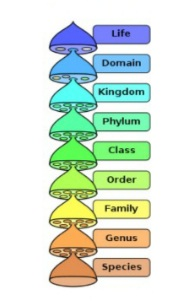

In [41]:
mb1.index[:3]

Index(['Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera',
       'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus',
       'Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus'],
      dtype='object', name='Taxon')

In [42]:
mb1.index.is_unique    # checking uniqueness

True

**pandas.concat() :** Concatenate pandas objects along a particular axis with optional set logic along the other axes.

Here, *axis* argument is used which specifies the axis to concatenate along. 0 for index 1 for columns. By default 0.

In [43]:
pd.concat([mb1, mb2], axis=0).shape

(560, 1)

We observe that the index is no longer unique, due to overlap between the two DataFrames.

In [44]:
pd.concat([mb1, mb2], axis=0).index.is_unique

False

In [45]:
pd.concat([mb1, mb2], axis=1).shape

(438, 2)

In [46]:
pd.concat([mb1, mb2], axis=1).head()

                                                    Count  Count
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    7.0   23.0
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    2.0    2.0
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...    3.0   10.0
Archaea "Crenarchaeota" Thermoprotei Thermoprot...    3.0    9.0
Archaea "Euryarchaeota" "Methanomicrobia" Metha...    7.0    9.0

In [47]:
pd.concat([mb1, mb2], axis=1).values[:5]

array([[ 7., 23.],
       [ 2.,  2.],
       [ 3., 10.],
       [ 3.,  9.],
       [ 7.,  9.]])

Argument **join :** Determines how to handle indexes on the other axis. Here, we are only interested on taxa that are included in both dataframe

In [48]:
pd.concat([mb1, mb2], axis=1, join='inner').head()

                                                    Count  Count
Taxon                                                           
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7     23
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2      2
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3     10
Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3      9
Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7      9

**DataFrame.combine_first() :** Used to update null elements with value in the same location in other. It combines two dataframe objects by filling null values in one dataframe with not-null values from other DataFrame.

In [49]:
mb1.combine_first(mb2).head()

                                                    Count
Taxon                                                    
Archaea "Crenarchaeota" Thermoprotei Acidilobal...    2.0
Archaea "Crenarchaeota" Thermoprotei Acidilobal...   14.0
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    7.0
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    1.0
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    2.0

We can also create a hierarchical index based on keys identifying the original tables

In [50]:
pd.concat([mb1, mb2], keys=['patient1', 'patient2']).head()

                                                             Count
         Taxon                                                    
patient1 Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7
         Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2
         Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3
         Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3
         Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7

In [51]:
pd.concat([mb1, mb2], keys=['patient1', 'patient2']).index.is_unique

True

We can also pass DataFrame as a dict as an keys to the concatenation.

In [52]:
pd.concat(dict(patient1=mb1, patient2=mb2), axis=1).head()

                                                   patient1 patient2
                                                      Count    Count
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7.0     23.0
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2.0      2.0
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3.0     10.0
Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3.0      9.0
Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7.0      9.0

### **Exercise**

In the data/microbiome subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10th file that describes the content of each. Write code that imports each of the data spreadsheets and combines them into a single *DataFrame,* adding the identifying information from the metadata spreadsheet as columns in the combined *DataFrame.*

In [140]:
metadata = pd.read_excel(r'C:\Users\91939\Downloads\data\data\microbiome\metadata.xls', sheet_name='Sheet1')

chunks = []
for i in range(9):
    file = pd.read_excel(r'C:\Users\91939\Downloads\data\data\microbiome\MID{0}.xls'.format(i+1), 'Sheet 1', index_col=0, header=None, names=['Taxon', 'Count'])      # loading file
    file.columns = ['Count']                           # accessing column 'count' from each filr       
    file.index.name = 'Taxon'                          # giving its index name as 'taxon'
    for m in metadata.columns:
        file[m] = metadata.iloc[i][m]                  
    chunks.append(file)                                # appending(adding) file to chunks

pd.concat(chunks)                                      # combineing them into a single DataFrame

                                                    Count BARCODE  \
Taxon                                                               
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7    MID1   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2    MID1   
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3    MID1   
Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3    MID1   
Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7    MID1   
...                                                   ...     ...   
Bacteria "Thermotogae" Thermotogae Thermotogale...     43    MID9   
Bacteria "Thermotogae" Thermotogae Thermotogale...     16    MID9   
Bacteria "Verrucomicrobia" Opitutae Opitutales ...      1    MID9   
Bacteria Cyanobacteria Cyanobacteria  Chloropla...      1    MID9   
Bacteria Cyanobacteria Cyanobacteria  Chloropla...     10    MID9   

                                                                 GROUP SAMPLE  
Taxon                 

### **Reshaping DataFrame objects**

**cdystonia data :** These data are from a multicenter, randomized controlled trial of botulinum toxin type B (BotB) in patients with cervical dystonia from nine U.S. sites.

* Randomized to placebo (N=36), 5000 units of BotB (N=36), 10,000 units of BotB (N=37)
* Response variable: total score on Toronto Western Spasmodic Torticollis Rating Scale (TWSTRS), measuring severity, pain, and disability of cervical dystonia (high scores mean more impairment)
* TWSTRS measured at baseline (week 0) and weeks 2, 4, 8, 12, 16 after treatment began

This dataset includes repeated measurements of the same individuals:

1. Showing each repeated measurement in their own row.
2. In multiple columns representing mutliple measurements.

In [53]:
cdystonia = pd.read_csv(r"C:\Users\91939\Downloads\data\data\cdystonia.csv", index_col=None)
cdystonia.head()

   patient  obs  week  site  id  treat  age sex  twstrs
0        1    1     0     1   1  5000U   65   F      32
1        1    2     2     1   1  5000U   65   F      30
2        1    3     4     1   1  5000U   65   F      24
3        1    4     8     1   1  5000U   65   F      37
4        1    5    12     1   1  5000U   65   F      39

**pandas.DataFrame.stack() :** Stack the prescribed level(s) from columns to index. Return a reshaped DataFrame or Series having a multi-level index with one or more new inner-most levels compared to the current DataFrame. 

Here, we are rotating the data frame so that columns are represented in rows

In [54]:
stacked = cdystonia.stack()
stacked

0    patient        1
     obs            1
     week           0
     site           1
     id             1
                ...  
630  id            11
     treat      5000U
     age           57
     sex            M
     twstrs        51
Length: 5679, dtype: object

**pandas.DataFrame.unstack() :** Pivot a level of the (necessarily hierarchical) index labels. Returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels. 

Here, unstacking rows back to columns.

In [55]:
stacked.unstack().head()

  patient obs week site id  treat age sex twstrs
0       1   1    0    1  1  5000U  65   F     32
1       1   2    2    1  1  5000U  65   F     30
2       1   3    4    1  1  5000U  65   F     24
3       1   4    8    1  1  5000U  65   F     37
4       1   5   12    1  1  5000U  65   F     39

Created a hierarchical index based on the patient and observation

In [56]:
cdystonia2 = cdystonia.set_index(['patient','obs'])
cdystonia2.head()

             week  site  id  treat  age sex  twstrs
patient obs                                        
1       1       0     1   1  5000U   65   F      32
        2       2     1   1  5000U   65   F      30
        3       4     1   1  5000U   65   F      24
        4       8     1   1  5000U   65   F      37
        5      12     1   1  5000U   65   F      39

In [57]:
cdystonia2.index.is_unique

True

*unstack* the *twstrs* measurements according to *obs* to transform the data such that the repeated measurements are in columns.

In [58]:
twstrs_wide = cdystonia2['twstrs'].unstack('obs')
twstrs_wide.head()

obs         1     2     3     4     5     6
patient                                    
1        32.0  30.0  24.0  37.0  39.0  36.0
2        60.0  26.0  27.0  41.0  65.0  67.0
3        44.0  20.0  23.0  26.0  35.0  35.0
4        53.0  61.0  64.0  62.0   NaN   NaN
5        53.0  35.0  48.0  49.0  41.0  51.0

In [59]:
cdystonia_long = cdystonia[['patient','site','id','treat','age','sex']].drop_duplicates().merge(
                    twstrs_wide, right_index=True, left_on='patient', how='inner').head()
cdystonia_long

    patient  site  id    treat  age sex     1     2     3     4     5     6
0         1     1   1    5000U   65   F  32.0  30.0  24.0  37.0  39.0  36.0
6         2     1   2   10000U   70   F  60.0  26.0  27.0  41.0  65.0  67.0
12        3     1   3    5000U   64   F  44.0  20.0  23.0  26.0  35.0  35.0
18        4     1   4  Placebo   59   F  53.0  61.0  64.0  62.0   NaN   NaN
22        5     1   5   10000U   76   F  53.0  35.0  48.0  49.0  41.0  51.0

In [60]:
# set the patient-level information as an index before unstacking

cdystonia.set_index(['patient','site','id','treat','age','sex','week'])['twstrs'].unstack('week').head()

week                               0     2     4     8     12    16
patient site id treat   age sex                                    
1       1    1  5000U   65  F    32.0  30.0  24.0  37.0  39.0  36.0
2       1    2  10000U  70  F    60.0  26.0  27.0  41.0  65.0  67.0
3       1    3  5000U   64  F    44.0  20.0  23.0  26.0  35.0  35.0
4       1    4  Placebo 59  F    53.0  61.0  64.0  62.0   NaN   NaN
5       1    5  10000U  76  F    53.0  35.0  48.0  49.0  41.0  51.0

**pandas.melt() :** Unpivot a DataFrame from wide to long format

In [61]:
pd.melt(cdystonia_long, id_vars=['patient','site','id','treat','age','sex'], 
        var_name='obs', value_name='twsters').head()

   patient  site  id    treat  age sex obs  twsters
0        1     1   1    5000U   65   F   1     32.0
1        2     1   2   10000U   70   F   1     60.0
2        3     1   3    5000U   64   F   1     44.0
3        4     1   4  Placebo   59   F   1     53.0
4        5     1   5   10000U   76   F   1     53.0

Two **formats** for *longitudinal data:*

1. ***long :*** Additional data can be included as additional rows in the database therefore better to store data.
2. ***wide :*** Requires that the entire database schema be altered by adding columns to every row as data are collected.

### **Pivoting**

The *pivot* method allows a DataFrame to be transformed easily between long and wide formats. It takes three arguments: *index*, *columns* and *values*.

**pandas.DataFrame.pivot() :** Return reshaped DataFrame organized by given index / column values.

In [62]:
cdystonia.pivot(index='patient', columns='obs', values='twstrs').head()        # twstrs variable in wide format according to patient

obs         1     2     3     4     5     6
patient                                    
1        32.0  30.0  24.0  37.0  39.0  36.0
2        60.0  26.0  27.0  41.0  65.0  67.0
3        44.0  20.0  23.0  26.0  35.0  35.0
4        53.0  61.0  64.0  62.0   NaN   NaN
5        53.0  35.0  48.0  49.0  41.0  51.0

We get a DataFrame with hierarchical columns if we omit *values* argument. Similar as unstack to the hierarchically-indexed table.

In [63]:
cdystonia.pivot('patient', 'obs')

        week                            site                 ...  sex          \
obs        1    2    3    4     5     6    1    2    3    4  ...    3  4    5   
patient                                                      ...                
1        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...    F  F    F   
2        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...    F  F    F   
3        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...    F  F    F   
4        0.0  2.0  4.0  8.0   NaN   NaN  1.0  1.0  1.0  1.0  ...    F  F  NaN   
5        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...    F  F    F   
...      ...  ...  ...  ...   ...   ...  ...  ...  ...  ...  ...  ... ..  ...   
105      0.0  2.0  4.0  8.0  12.0  16.0  9.0  9.0  9.0  9.0  ...    F  F    F   
106      0.0  2.0  4.0  8.0  12.0  16.0  9.0  9.0  9.0  9.0  ...    M  M    M   
107      0.0  NaN  4.0  8.0   NaN  16.0  9.0  NaN  9.0  9.0  ...    M  M  NaN   
108      0.0  2.0  4.0  8.0 

**pandas.pivot_table() :** Creates a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.

In [64]:
"""
When used :
cdystonia.pivot_table(rows=['site', 'treat'], cols='week', values='twstrs', aggfunc=max).head(20)
Displayed:
TypeError: pivot_table() got an unexpected keyword argument 'rows'
TypeError: pivot_table() got an unexpected keyword argument 'cols'

"""

cdystonia.pivot_table(index=['site', 'treat'], columns='week', values='twstrs', aggfunc=max).head(20)

week          0   2   4   8   12  16
site treat                          
1    10000U   60  41  48  49  65  67
     5000U    44  32  34  43  42  46
     Placebo  53  61  64  62  32  38
2    10000U   65  60  60  64  67  66
     5000U    67  64  65  64  62  64
     Placebo  53  56  52  57  61  54
3    10000U   50  43  51  46  49  56
     5000U    52  44  47  50  50  49
     Placebo  43  38  40  48  49  44
4    10000U   54  52  52  54  51  57
     5000U    52  34  43  45  47  46
     Placebo  52  55  51  52  54  57
5    10000U   50  50  32  46  54  57
     5000U    60  53  55  62  67  26
     Placebo  60  57  53  52  53  58
6    10000U   55  56  47  53  51  51
     5000U    59  55  50  56  59  53
     Placebo  54  53  51  57  57  57
7    10000U   53  47  45  45  50  53
     5000U    53  45  52  51  52  53

**pandas.crosstab() :** Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

The factors may be hierarchical if desired.

In [65]:
pd.crosstab(cdystonia.sex, cdystonia.site)

site   1   2   3   4   5   6   7   8   9
sex                                     
F     52  53  42  30  22  54  66  48  28
M     18  29  30  18  11  33   6  58  33

### **Data transformation**

The process of converting data from one form to other as per our need is known as Data Transformation. This includes tasks such as:

* Removing duplicate values
* Replacing values
* Grouping values.

#### **Dealing with Duplicates**

**pandas.DataFrame.duplicated() :** Returns boolean Series denoting duplicate rows.

*Parameters are :*

1. **subset :** Only consider certain columns for identifying duplicates, by default use all of the columns.
2. **keep :** Determines which duplicates (if any) to mark. It can be first, last, False. By default first.

Here, removing *vessels* dataset having same value.

In [66]:
"""
When used : vessels.duplicated(cols='names')
Showed  :  TypeError: duplicated() got an unexpected keyword argument 'cols'

"""

vessels.duplicated(subset='names')

mmsi
1            False
9            False
21           False
74           False
103          False
             ...  
919191919    False
967191190     True
975318642     True
987654321    False
999999999     True
Length: 10771, dtype: bool

**pandas.DataFrame.drop_duplicates() :** Return DataFrame with duplicate rows removed.

In [67]:
vessels.drop_duplicates(['names'])

           num_names                                              names sov  \
mmsi                                                                          
1                  8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y   
9                  3                         000000009/Raven/Shearwater   N   
21                 1                                      Us Gov Vessel   Y   
74                 2                                  Mcfaul/Sarah Bell   N   
103                3           Ron G/Us Navy Warship 103/Us Warship 103   Y   
...              ...                                                ...  ..   
857632392          1                                           Ct Pilot   N   
888888888          1                                         Earl Jones   N   
900000000          3      Capt.webster      Pc/Elk River/Roger Binsfeld   N   
919191919          1                                                 Oi   N   
987654321          2                         Island 

#### **Value replacement**

In order for quantitative analysis of data we will require numerical data. So we may need to replace string encoded data to numerical data.

**value_counts() :** Return a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. It excludes NA values by default.

Consider the treatment variable in the cervical dystonia dataset:

In [68]:
cdystonia.treat.value_counts()

10000U     213
5000U      211
Placebo    207
Name: treat, dtype: int64

Here, we created a dict where original values as keys and replacements as values.

In [69]:
treatment_map = {'Placebo': 0, '5000U': 1, '10000U': 2}

**pandas.Series.map :** Map values of Series according to input correspondence. Used for substituting each value in a Series with another value, that may be derived from a function, a *dict* or a *Series.*

In [70]:
cdystonia['treatment'] = cdystonia.treat.map(treatment_map)
cdystonia.treatment

0      1
1      1
2      1
3      1
4      1
      ..
626    1
627    1
628    1
629    1
630    1
Name: treatment, Length: 631, dtype: int64

***Note :*** We can also replace a particular values in a *Series* or *DataFrame* using *replace* method.

An example where replacement is useful is dealing with zeros in certain transformations. For example, if we try to take the log of a set of values

In [71]:
vals = pd.Series([float(i)**10 for i in range(10)])
vals

0    0.000000e+00
1    1.000000e+00
2    1.024000e+03
3    5.904900e+04
4    1.048576e+06
5    9.765625e+06
6    6.046618e+07
7    2.824752e+08
8    1.073742e+09
9    3.486784e+09
dtype: float64

In [72]:
np.log(vals)

C:\Users\91939\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0         -inf
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

We found divide by zero in log. In order to remove this we can replace the zero with a value so small that it makes no difference to the ensuing analysis. With the help of **replace** function.

In [73]:
vals = vals.replace(0, 1e-6)
np.log(vals)

0   -13.815511
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

We can also perform the same replacement that we used *map* for with *replace:*

In [74]:
cdystonia2.treat.replace({'Placebo': 0, '5000U': 1, '10000U': 2})

patient  obs
1        1      1
         2      1
         3      1
         4      1
         5      1
               ..
109      1      1
         2      1
         4      1
         5      1
         6      1
Name: treat, Length: 631, dtype: int64

#### **Inidcator variables**

**get_dummies() :** Categorical or group variables are converted into columns of indicators--zeros and ones--to create a so-called design matrix using this function.

Consider the DataFrame containing the ships corresponding to the transit segments on the eastern seaboard. The *type* variable denotes the class of vessel; we can create a matrix of indicators for this.

In [75]:
top5 = vessels.type.apply(lambda s: s in vessels.type.value_counts().index[:5])
vessels5 = vessels[top5]

In [76]:
pd.get_dummies(vessels5.type).head(10)

         Cargo  Pleasure  Sailing  Tanker  Tug
mmsi                                          
15151        0         0        0       0    1
80404        0         1        0       0    0
366235       1         0        0       0    0
587370       0         0        0       0    1
693559       0         0        0       0    1
1233916      0         1        0       0    0
3041300      1         0        0       0    0
3663760      1         0        0       0    0
3688360      1         0        0       0    0
7718175      1         0        0       0    0

#### **Discretization**

***Note :*** Discretization is generally a very bad idea for statistical analysis, so use this function responsibly.

**pandas.DataFrame.describe() :** Generate descriptive statistics like central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

**pandas.cut() :** Bin values into discrete intervals.

Lets say we want to bin the ages of the cervical dystonia patients into a smaller number of groups:

In [77]:
cdystonia.age.describe()

count    631.000000
mean      55.616482
std       12.123910
min       26.000000
25%       46.000000
50%       56.000000
75%       65.000000
max       83.000000
Name: age, dtype: float64

In [78]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90])[:30]         # Transforming data to decades from 20 to 90

0     (60, 70]
1     (60, 70]
2     (60, 70]
3     (60, 70]
4     (60, 70]
        ...   
25    (70, 80]
26    (70, 80]
27    (70, 80]
28    (50, 60]
29    (50, 60]
Name: age, Length: 30, dtype: category
Categories (7, interval[int64]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90]]

*Points :*

1. The parentheses indicate an open interval, meaning that the interval includes values up to but not including the endpoint.
2. The square bracket is a closed interval, where the endpoint is included in the interval.
3. We can switch the closure to the left side by setting the right flag to False

In [79]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90], right=False)[:30]

0     [60, 70)
1     [60, 70)
2     [60, 70)
3     [60, 70)
4     [60, 70)
        ...   
25    [70, 80)
26    [70, 80)
27    [70, 80)
28    [50, 60)
29    [50, 60)
Name: age, Length: 30, dtype: category
Categories (7, interval[int64]): [[20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80) < [80, 90)]

Giving labels to *ordianl data* obtained from numeric data.

In [80]:
pd.cut(cdystonia.age, [20,40,60,80,90], labels=['young','middle-aged','old','ancient'])[:30]

0             old
1             old
2             old
3             old
4             old
         ...     
25            old
26            old
27            old
28    middle-aged
29    middle-aged
Name: age, Length: 30, dtype: category
Categories (4, object): [young < middle-aged < old < ancient]

**pandas.qcut() :** Quantile-based discretization function. It discretize variable into equal-sized buckets based on rank or based on sample quantiles. 

*For example :* If we divide dataset of 100 number into 4 different parts (0-25, 26-50, 51-75, 76-100), we only have to specify 4 interval.

*By Default :* It will be equally spaced.

In [81]:
pd.qcut(cdystonia.age, 4)[:30]

0     (56.0, 65.0]
1     (56.0, 65.0]
2     (56.0, 65.0]
3     (56.0, 65.0]
4     (56.0, 65.0]
          ...     
25    (65.0, 83.0]
26    (65.0, 83.0]
27    (65.0, 83.0]
28    (56.0, 65.0]
29    (56.0, 65.0]
Name: age, Length: 30, dtype: category
Categories (4, interval[float64]): [(25.999, 46.0] < (46.0, 56.0] < (56.0, 65.0] < (65.0, 83.0]]

In [82]:
quantiles = pd.qcut(segments.seg_length, [0, 0.01, 0.05, 0.95, 0.99, 1])       # Specifying custom quantities to act as a cut point
quantiles[:30]

0      (1.8, 7.8]
1     (7.8, 45.4]
2      (1.8, 7.8]
3     (7.8, 45.4]
4     (7.8, 45.4]
         ...     
25    (7.8, 45.4]
26    (7.8, 45.4]
27    (7.8, 45.4]
28    (7.8, 45.4]
29    (7.8, 45.4]
Name: seg_length, Length: 30, dtype: category
Categories (5, interval[float64]): [(0.999, 1.8] < (1.8, 7.8] < (7.8, 45.4] < (45.4, 89.7] < (89.7, 1882.0]]

***Note :*** We can easily combine discretiztion with the generation of indicator variables. 

In [83]:
pd.get_dummies(quantiles).head(10)

   (0.999, 1.8]  (1.8, 7.8]  (7.8, 45.4]  (45.4, 89.7]  (89.7, 1882.0]
0             0           1            0             0               0
1             0           0            1             0               0
2             0           1            0             0               0
3             0           0            1             0               0
4             0           0            1             0               0
5             0           0            1             0               0
6             0           0            0             1               0
7             0           0            1             0               0
8             0           0            1             0               0
9             0           0            1             0               0

### **Permutation and sampling**

To randomly reorder data and draw random values from it.

**numpy.random.permutation() :** Randomly permute a sequence, or return a permuted range.

In [84]:
new_order = np.random.permutation(len(segments))       # It generates an array with a permuted sequence of integers, we specified lngth as according to  us
new_order[:30]

array([164098, 115460,  86573, 117726,  70731, 152644, 220252,  98941,
       238617, 231093, 180232,  71382, 124874,  73572, 159570,  87827,
         9048,  39643, 227121, 160721, 111443,   5069,  98771,  57586,
       241906, 211731, 241617, 124159,  27672, 142023])

**pandas.DataFrame.take() :** It returns the elements in the given positional indices along an axis. We are indexing according to the actual position of the element in the object.

In [85]:
segments.take(new_order).head()               # that generated sequence is used as an order

             mmsi             name  transit  segment  seg_length  avg_sog  \
164098  367336000          Resolve       85        1        16.6      8.2   
115460  366818000  President Adams      125        1        15.2     14.2   
86573   353274000     Nyk Daedalus        4        1        18.7     17.7   
117726  366883240      Adriaticsea       74        2        21.5      7.1   
70731   319323000            Harle        5        2        19.1     11.7   

        min_sog  max_sog  pdgt10        st_time       end_time type  
164098      3.7     11.2    33.5  3/23/11 23:24   3/24/11 1:25  foo  
115460      9.4     14.8    85.4  5/22/11 11:53  5/22/11 12:59  foo  
86573      11.3     21.5   100.0  12/6/08 10:31  12/6/08 11:35  foo  
117726      6.8      7.3     0.0  8/31/09 21:01  8/31/09 23:59  foo  
70731      10.2     12.9   100.0   5/7/09 19:34   5/7/09 21:12  foo  

Comapre the above output with original:

In [86]:
segments.head()

   mmsi               name  transit  segment  seg_length  avg_sog  min_sog  \
0     1        Us Govt Ves        1        1         5.1     13.2      9.2   
1     1  Dredge Capt Frank        1        1        13.5     18.6     10.4   
2     1      Us Gov Vessel        1        1         4.3     16.2     10.3   
3     1      Us Gov Vessel        2        1         9.2     15.4     14.5   
4     1  Dredge Capt Frank        2        1         9.2     15.4     14.6   

   max_sog  pdgt10        st_time       end_time type  
0     14.5    96.5  2/10/09 16:03  2/10/09 16:27  foo  
1     20.6   100.0   4/6/09 14:31   4/6/09 15:20  foo  
2     20.5   100.0   4/6/09 14:36   4/6/09 14:55  foo  
3     16.1   100.0  4/10/09 17:58  4/10/09 18:34  foo  
4     16.2   100.0  4/10/09 17:59  4/10/09 18:35  foo  

### **Exercise**

Its easy to see how this permutation approach allows us to draw a random sample **without replacement.** How would you sample **with replacement?** Generate a random sample of 5 ships from the *vessels* DataFrame using this scheme.

**pandas.DataFrame.sample() :** Return a random sample of items from an axis of object.

*Parameters are :*

1. *n :* Number of items from axis to return
2. *frac :* Fraction of axis items to return. Cannot be used with n.
3. *replace :* Allow or disallow sampling of the same row more than once.
4. *weights :* Default ‘None’ results in equal probability weighting
5. *random_state :* seed for random number generator
6. *axis :* which axis to sample, 0 for rows/index and 1 for columns

In [139]:
sample = vessels.sample(n=5, replace=True)
sample

           num_names                            names sov  \
mmsi                                                        
256512000          2  Atlantic Impala/Atlantic_impala   N   
563119000          1                       Nyk Joanna   N   
538004394          1                    Primo Stealth   N   
636011072          1                    Sanko Supreme   N   
247029800          1               Valle Di Castiglia   N   

                                          flag flag_type  num_loas    loa  \
mmsi                                                                        
256512000                               Malta    Foreign         1  173.0   
563119000             Singapore (Republic of)    Foreign         1  210.0   
538004394  Marshall Islands (Republic of the)    Foreign         1  256.0   
636011072               Liberia (Republic of)    Foreign         1  195.0   
247029800                               Italy    Foreign         1  176.0   

           max_loa  num_types   

## **Data aggregation and GroupBy operations**

**pandas.DataFrame.groupby() :** It groups DataFrame using a mapper or by a Series of columns. Uses of *groupby* operations :

* **Transformation :** Involves some combination of splitting the object i.e transformation
* **Aggregation :** Applying a function, and combining (aggregating) the results
* Used to group large amounts of data and compute operations on it.

In [87]:
cdystonia_grouped = cdystonia.groupby(cdystonia.patient)

It is hard to visulise this grouped data.

In [88]:
cdystonia_grouped

We can *iterate* over each patients group:

In [90]:
for patient, group in cdystonia_grouped:
    print(patient)
    print(group)
    print()

1
   patient  obs  week  site  id  treat  age sex  twstrs  treatment
0        1    1     0     1   1  5000U   65   F      32          1
1        1    2     2     1   1  5000U   65   F      30          1
2        1    3     4     1   1  5000U   65   F      24          1
3        1    4     8     1   1  5000U   65   F      37          1
4        1    5    12     1   1  5000U   65   F      39          1
5        1    6    16     1   1  5000U   65   F      36          1

2
    patient  obs  week  site  id   treat  age sex  twstrs  treatment
6         2    1     0     1   2  10000U   70   F      60          2
7         2    2     2     1   2  10000U   70   F      26          2
8         2    3     4     1   2  10000U   70   F      27          2
9         2    4     8     1   2  10000U   70   F      41          2
10        2    5    12     1   2  10000U   70   F      65          2
11        2    6    16     1   2  10000U   70   F      67          2

3
    patient  obs  week  site  id  treat 

**Split-Apply-Combine Operation :** In this method we first slpit the data into smaller groups, applies function to each group then recombines them into a new data table.

**pandas.DataFrame.aggregate() :** Aggregate using one or more operations over the specified axis. Here, function **mean** is used as an parameter 

In [93]:
"""
When used  :  cdystonia_grouped.agg(mean).head()

Shows  :  NameError: name 'mean' is not defined
Because it should be pased as a string.

"""

cdystonia_grouped.agg("mean").head()

         patient  obs  week  site   id   age     twstrs  treatment
patient                                                           
1            1.0  3.5   7.0   1.0  1.0  65.0  33.000000        1.0
2            2.0  3.5   7.0   1.0  2.0  70.0  47.666667        2.0
3            3.0  3.5   7.0   1.0  3.0  64.0  30.500000        1.0
4            4.0  2.5   3.5   1.0  4.0  59.0  60.000000        0.0
5            5.0  3.5   7.0   1.0  5.0  76.0  46.166667        2.0

***Note :*** Non string values like treat and sex variables are automatically ignored as it does not makes any sense in aggregation.

Pandas has a easy way to calculate aggregation of some comman function. *Example :* mean() method

In [94]:
cdystonia_grouped.mean().head()

         patient  obs  week  site   id   age     twstrs  treatment
patient                                                           
1            1.0  3.5   7.0   1.0  1.0  65.0  33.000000        1.0
2            2.0  3.5   7.0   1.0  2.0  70.0  47.666667        2.0
3            3.0  3.5   7.0   1.0  3.0  64.0  30.500000        1.0
4            4.0  2.5   3.5   1.0  4.0  59.0  60.000000        0.0
5            5.0  3.5   7.0   1.0  5.0  76.0  46.166667        2.0

**pandas.DataFrame.add_suffix() :** It suffix labels with string suffix. It takes input as a string. 

* For Series, the row labels are suffixed. 
* For DataFrame, the column labels are suffixed. 
* It returns *New Series* or *DataFrame* with updated labels.

**pandas.DataFrame.add_prefix() :** It prefix labels with string prefix. 

* For Series, the row labels are prefixed. 
* For DataFrame, the column labels are prefixed. 
* It returns *New Series* or *DataFrame* with updated labels.

In [95]:
cdystonia_grouped.mean().add_suffix('_mean').head()

         patient_mean  obs_mean  week_mean  site_mean  id_mean  age_mean  \
patient                                                                    
1                 1.0       3.5        7.0        1.0      1.0      65.0   
2                 2.0       3.5        7.0        1.0      2.0      70.0   
3                 3.0       3.5        7.0        1.0      3.0      64.0   
4                 4.0       2.5        3.5        1.0      4.0      59.0   
5                 5.0       3.5        7.0        1.0      5.0      76.0   

         twstrs_mean  treatment_mean  
patient                               
1          33.000000             1.0  
2          47.666667             2.0  
3          30.500000             1.0  
4          60.000000             0.0  
5          46.166667             2.0  

**pandas.DataFrame.quantile() :** It returns values at the given quantile over requested axis in the form of *Series* or *DataFrame*.

In [96]:
# The median of the `twstrs` variable
cdystonia_grouped['twstrs'].quantile(0.5)

patient
1      34.0
2      50.5
3      30.5
4      61.5
5      48.5
       ... 
105    45.5
106    67.5
107    44.0
108    50.5
109    38.0
Name: twstrs, Length: 109, dtype: float64

We can also *aggregate* according to *muptiple keys:*

In [97]:
cdystonia.groupby(['week','site']).mean().head()

           patient  obs   id        age     twstrs  treatment
week site                                                    
0    1         6.5  1.0  6.5  59.000000  43.083333   1.000000
     2        19.5  1.0  7.5  53.928571  51.857143   0.928571
     3        32.5  1.0  6.5  51.500000  38.750000   1.000000
     4        42.5  1.0  4.5  59.250000  48.125000   1.000000
     5        49.5  1.0  3.5  51.833333  49.333333   1.000000

We can also *tranform* data :

**pandas.DataFrame.transform() :** Takes function as an input and returns the dataframe of transformed funtion.

In [98]:
normalize = lambda x: (x - x.mean())/x.std()

cdystonia_grouped.transform(normalize).head()

   patient       obs      week  site  id  age    twstrs  treatment
0      NaN -1.336306 -1.135550   NaN NaN  NaN -0.181369        NaN
1      NaN -0.801784 -0.811107   NaN NaN  NaN -0.544107        NaN
2      NaN -0.267261 -0.486664   NaN NaN  NaN -1.632322        NaN
3      NaN  0.267261  0.162221   NaN NaN  NaN  0.725476        NaN
4      NaN  0.801784  0.811107   NaN NaN  NaN  1.088214        NaN

We can also **select column** under *groupby* function as per our need and then apply *split-apply-combine* operations on those subset of columns

In [99]:
cdystonia_grouped['twstrs'].mean().head()

patient
1    33.000000
2    47.666667
3    30.500000
4    60.000000
5    46.166667
Name: twstrs, dtype: float64

In [100]:
cdystonia_grouped[['twstrs']].mean().head()            # This gives the same result as a DataFrame

            twstrs
patient           
1        33.000000
2        47.666667
3        30.500000
4        60.000000
5        46.166667

For *dividing DataFrames into chunks:* Convert them into a *dict* so that they can be easily indexed 

In [101]:
chunks = dict(list(cdystonia_grouped))

In [102]:
chunks[4]

    patient  obs  week  site  id    treat  age sex  twstrs  treatment
18        4    1     0     1   4  Placebo   59   F      53          0
19        4    2     2     1   4  Placebo   59   F      61          0
20        4    3     4     1   4  Placebo   59   F      64          0
21        4    4     8     1   4  Placebo   59   F      62          0

**axis :** This argument of *groupby* is used to group data into either rows(axis=0) or columns(axis=1). By default it is grouped by *rows*.

In [103]:
dict(list(cdystonia.groupby(cdystonia.dtypes, axis=1)))        # group by column

{dtype('int64'):      patient  obs  week  site  id  age  twstrs  treatment
 0          1    1     0     1   1   65      32          1
 1          1    2     2     1   1   65      30          1
 2          1    3     4     1   1   65      24          1
 3          1    4     8     1   1   65      37          1
 4          1    5    12     1   1   65      39          1
 ..       ...  ...   ...   ...  ..  ...     ...        ...
 626      109    1     0     9  11   57      53          1
 627      109    2     2     9  11   57      38          1
 628      109    4     8     9  11   57      33          1
 629      109    5    12     9  11   57      36          1
 630      109    6    16     9  11   57      51          1
 
 [631 rows x 8 columns],
 dtype('O'):      treat sex
 0    5000U   F
 1    5000U   F
 2    5000U   F
 3    5000U   F
 4    5000U   F
 ..     ...  ..
 626  5000U   M
 627  5000U   M
 628  5000U   M
 629  5000U   M
 630  5000U   M
 
 [631 rows x 2 columns]}

Its also possible to group by one or more levels of a hierarchical index.

In [104]:
cdystonia2.head(10)      # it was created while hierarchical index

             week  site  id   treat  age sex  twstrs
patient obs                                         
1       1       0     1   1   5000U   65   F      32
        2       2     1   1   5000U   65   F      30
        3       4     1   1   5000U   65   F      24
        4       8     1   1   5000U   65   F      37
        5      12     1   1   5000U   65   F      39
        6      16     1   1   5000U   65   F      36
2       1       0     1   2  10000U   70   F      60
        2       2     1   2  10000U   70   F      26
        3       4     1   2  10000U   70   F      27
        4       8     1   2  10000U   70   F      41

In [105]:
cdystonia2.groupby(level='obs', axis=0)['twstrs'].mean()

obs
1    45.651376
2    37.611650
3    37.066038
4    39.807692
5    42.913462
6    45.628571
Name: twstrs, dtype: float64

### **Apply**

**pandas.DataFrame.apply() :** Apply a function along an axis of the DataFrame.

**top() :** User defined function which takes a Dataframe and column names. sort them in order then return *n* largest value of that column.

In [108]:
def top(df, column, n=5):
    return df.sort_values(by=column, ascending=False)[:n]          # Replaced sort_index by sort_values as it does nit have by argument (explained in part1 )

Here, returning the 3 longest segments travelled by each ship.

In [109]:
top3segments = segments_merged.groupby('mmsi').apply(top, column='seg_length', n=3)[['names', 'seg_length']]
top3segments

                                                              names  \
mmsi                                                                  
1         6       Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   
          5       Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   
          7       Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   
9         15                             000000009/Raven/Shearwater   
          14                             000000009/Raven/Shearwater   
...                                                             ...   
987654321 262507                         Island Lookout/Island Tide   
          262510                         Island Lookout/Island Tide   
999999999 262520                                  Triple Attraction   
          262524                                  Triple Attraction   
          262525                                  Triple Attraction   

                  seg_length  
mmsi                          
1         6   

***Note :*** Additional arguments for the applied function can be passed through *apply* after the function name.

In [110]:
top3segments.head(20)

                                                     names  seg_length
mmsi                                                                  
1    6   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        76.0
     5   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        17.4
     7   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        13.7
9    15                         000000009/Raven/Shearwater        47.2
     14                         000000009/Raven/Shearwater        31.4
     13                         000000009/Raven/Shearwater        19.3
21   16                                      Us Gov Vessel        48.7
     25                                      Us Gov Vessel        25.3
     30                                      Us Gov Vessel        21.7
74   35                                  Mcfaul/Sarah Bell         7.4
     34                                  Mcfaul/Sarah Bell         1.4
103  37           Ron G/Us Navy Warship 103/Us Warship 103        87.5
     4

In [111]:
mb1.index[:3]              # using microbime data 

Index(['Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera',
       'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus',
       'Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus'],
      dtype='object', name='Taxon')

Creating an index that just use domain, phylum and class classifications. Using *split* and *join* string methods.

**split() :** Split a string into a list where each word is a list item.

**join() :** This method takes all items in an iterable and joins them into one string.

In [112]:
class_index = mb1.index.map(lambda x: ' '.join(x.split(' ')[:3]))

In [113]:
mb_class = mb1.copy()
mb_class.index = class_index

Since there are multiple taxonomic units with the same class, our index is *no longer unique.*

In [114]:
mb_class.head()

                                           Count
Taxon                                           
Archaea "Crenarchaeota" Thermoprotei           7
Archaea "Crenarchaeota" Thermoprotei           2
Archaea "Crenarchaeota" Thermoprotei           3
Archaea "Crenarchaeota" Thermoprotei           3
Archaea "Euryarchaeota" "Methanomicrobia"      7

Establishing a unique index by summing all rows with the same class, using *groupby.*

In [115]:
mb_class.groupby(level=0).sum().head(10)

                                           Count
Taxon                                           
Archaea "Crenarchaeota" Thermoprotei          15
Archaea "Euryarchaeota" "Methanomicrobia"      9
Archaea "Euryarchaeota" Archaeoglobi           2
Archaea "Euryarchaeota" Halobacteria          12
Archaea "Euryarchaeota" Methanococci           1
Archaea "Euryarchaeota" Methanopyri           12
Archaea "Euryarchaeota" Thermoplasmata         2
Bacteria "Actinobacteria" Actinobacteria    1740
Bacteria "Aquificae" Aquificae                11
Bacteria "Bacteroidetes" "Bacteroidia"         1

### **Excersie**

Load the dataset in *titanic.xls.* It contains data on all the passengers that travelled on the Titanic.

In [117]:
from IPython.core.display import HTML
HTML(filename=r'C:\Users\91939\Downloads\data\data\titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


Women and children first?

1. Use the *groupby* method to calculate the proportion of passengers that survived by sex.
2. Calculate the same proportion, but by class and sex.
3. Create age categories: children (under 14 years), adolescents (14-20), adult (21-64), and senior(65+), and calculate survival proportions by age category, class and sex.

In [125]:
titanic = pd.read_excel(r'C:\Users\91939\Downloads\data\data\titanic.xls')      # loaded data titanic.xls
titanic.groupby('sex')['survived'].mean()                                       # Using groupby to calculate proportion of passengers that survived by sex.
titanic.groupby(['sex','pclass'])['survived'].mean()                            # propotion by class and sex
titanic['age_cat'] = pd.cut(titanic.age, [0,14,21,65,100], right=False)         # Using cut to bin values into provided intervals
titanic.groupby(['sex','pclass','age_cat'])['survived'].mean()                  # Calculating survival proportions by age category, class and sex.

sex     pclass  age_cat  
female  1       [0, 14)      0.000000
                [14, 21)     1.000000
                [21, 65)     0.965517
                [65, 100)    1.000000
        2       [0, 14)      1.000000
                [14, 21)     0.923077
                [21, 65)     0.868421
                [65, 100)         NaN
        3       [0, 14)      0.483871
                [14, 21)     0.542857
                [21, 65)     0.441860
                [65, 100)         NaN
male    1       [0, 14)      1.000000
                [14, 21)     0.200000
                [21, 65)     0.343284
                [65, 100)    0.142857
        2       [0, 14)      1.000000
                [14, 21)     0.117647
                [21, 65)     0.078125
                [65, 100)    0.000000
        3       [0, 14)      0.324324
                [14, 21)     0.123077
                [21, 65)     0.159836
                [65, 100)    0.000000
Name: survived, dtype: float64